In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from simulator import Simulator, nest
from tools_analysis import corrcoef, coef_var
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from tools_plot import savefig, fix_figure, set_style, despine, add_caption
import copy
from IPython.display import display

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from tqdm import tqdm_notebook as tqdm

from causal_optoconnectics.core import hit_rate

In [2]:
plt.rcParams['figure.figsize'] = (8,4)

In [22]:
from params_test import parameters
sim = Simulator(
    parameters, N_neurons=3, N_ex=2, N_in=1, fname='network_raster', data_path='results')

print('Setting kernel')
sim.set_kernel()

print('Setting neurons')
sim.set_neurons()

# print('Setting background')
# sim.set_background()

spikes = nest.Create("spike_generator", 1,
                              params={"spike_times": np.arange(1,1000,100.)})
nest.Connect(spikes, sim.nodes,
             syn_spec={"weight": 5, "delay": sim.p['res']})

nest.Create('spike_generator')

print('Setting connections')
sim.set_connections_simple()

if sim.p.get('gauss_mean') or sim.p.get('gauss_std'):
    print('Setting channelnoise')
    sim.set_channelnoise()
    
print('Setting spike recording')
sim.set_spike_rec()

print('Setting state recording')
sim.set_state_rec()

nest.Simulate(1000)

data = sim.data

Setting kernel
Setting neurons
Setting connections
Setting spike recording
Setting state recording


In [23]:
senders = sim.data['spiketrains']['ex']['senders']
times = sim.data['spiketrains']['ex']['times']
sender_ids = np.unique(senders)

spiketrains = {
    sender: times[sender==senders] for sender in tqdm(sender_ids)}

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [24]:
senders = sim.data['state']['ex']['senders']
V_m = sim.data['state']['ex']['V_m']
times = sim.data['state']['ex']['times']
sender_ids = np.unique(senders)

state = {
    sender: {'V_m': V_m[sender==senders], 'times': times[sender==senders]} for sender in tqdm(sender_ids)}

HBox(children=(IntProgress(value=0, max=2), HTML(value='')))

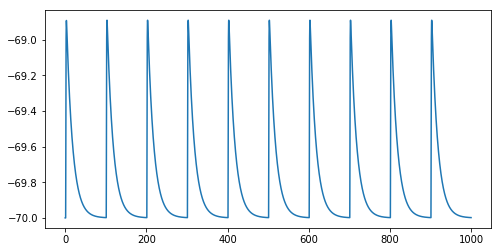

In [25]:
neuron_id = 1
plt.plot(state[neuron_id]['times'], state[neuron_id]['V_m'])
# plt.scatter(spiketrains[2], [-50] * len(spiketrains[2]), marker='|', s=1000, color='r')